In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import statsmodels.api as sm

Данные о домах в пригородах Бостона

1. Охарактеризуем линейную зависимость средней стоимости домов от процента владельцев с низким социальным статусом

In [24]:
data = pd.read_csv("Boston.csv", sep=';')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,"0,00632",18,"2,31",0,"0,538","6,575","65,2","4,09",1,296,"15,3","396,9","4,98",24
1,"0,02731",0,"7,07",0,"0,469","6,421","78,9","4,9671",2,242,"17,8","396,9","9,14","21,6"
2,"0,02729",0,"7,07",0,"0,469","7,185","61,1","4,9671",2,242,"17,8","392,83","4,03","34,7"
3,"0,03237",0,"2,18",0,"0,458","6,998","45,8","6,0622",3,222,"18,7","394,63","2,94","33,4"
4,"0,06905",0,"2,18",0,"0,458","7,147","54,2","6,0622",3,222,"18,7","396,9","5,33","36,2"


In [25]:
data['medv']=data.apply(lambda x: str.replace(x['medv'],',','.'),axis = 1)
data['medv'] = data.apply(lambda x: np.float(x['medv']),axis = 1)
data['lstat']=data.apply(lambda x: str.replace(x['lstat'],',','.'),axis = 1)
data['lstat'] = data.apply(lambda x: np.float(x['lstat']),axis = 1)
data['rm']=data.apply(lambda x: str.replace(x['rm'],',','.'),axis = 1)
data['rm'] = data.apply(lambda x: np.float(x['rm']),axis = 1)
data['age']=data.apply(lambda x: str.replace(x['age'],',','.'),axis = 1)
data['age'] = data.apply(lambda x: np.float(x['age']),axis = 1)
data['crim']=data.apply(lambda x: str.replace(x['crim'],',','.'),axis = 1)
data['crim'] = data.apply(lambda x: np.float(x['crim']),axis = 1)

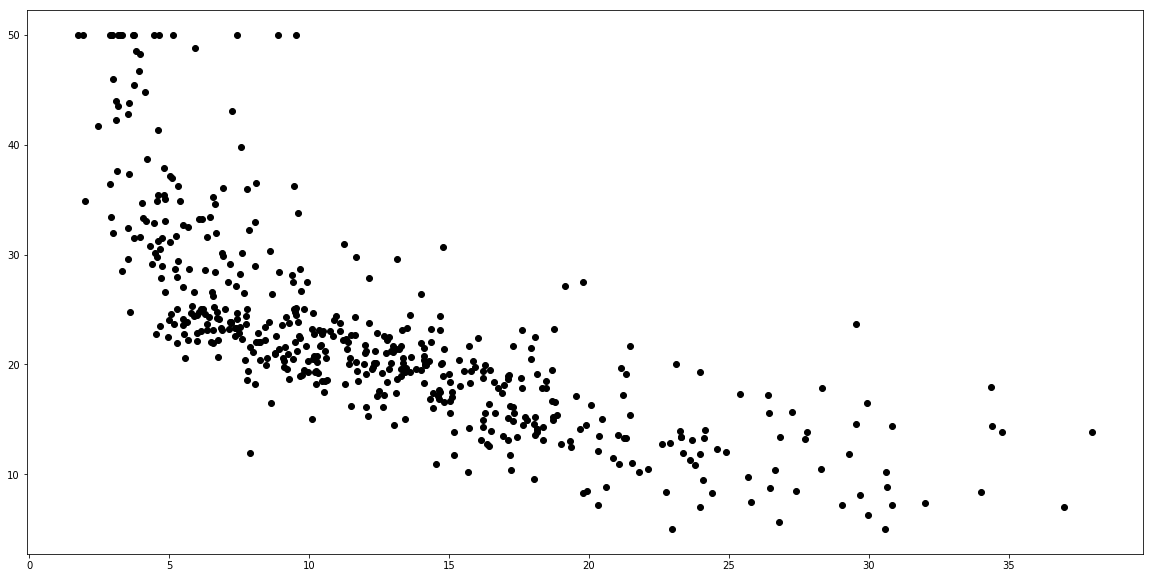

In [26]:
plt.figure(figsize = (20,10))
plt.scatter(data['lstat'], data['medv'], color = 'red', label = "Price")

Имеем: Средняя стоимость выше - процент ниже, значит у нас есть линейная зависимость с несильным шумом


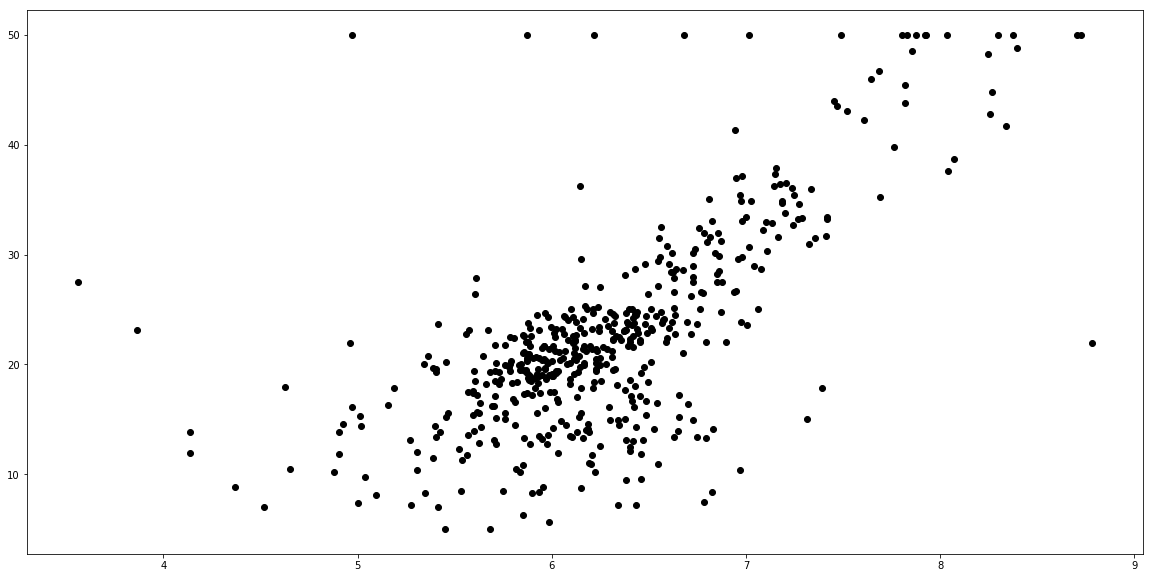

In [27]:
plt.figure(figsize = (20,10))
plt.scatter(data['rm'], data['medv'], color = 'red', label = "Price")

можно заметить,что с увеличением кол-ва комнат в доме ,увеличивается его стоимость(вроде очевидный факт:))

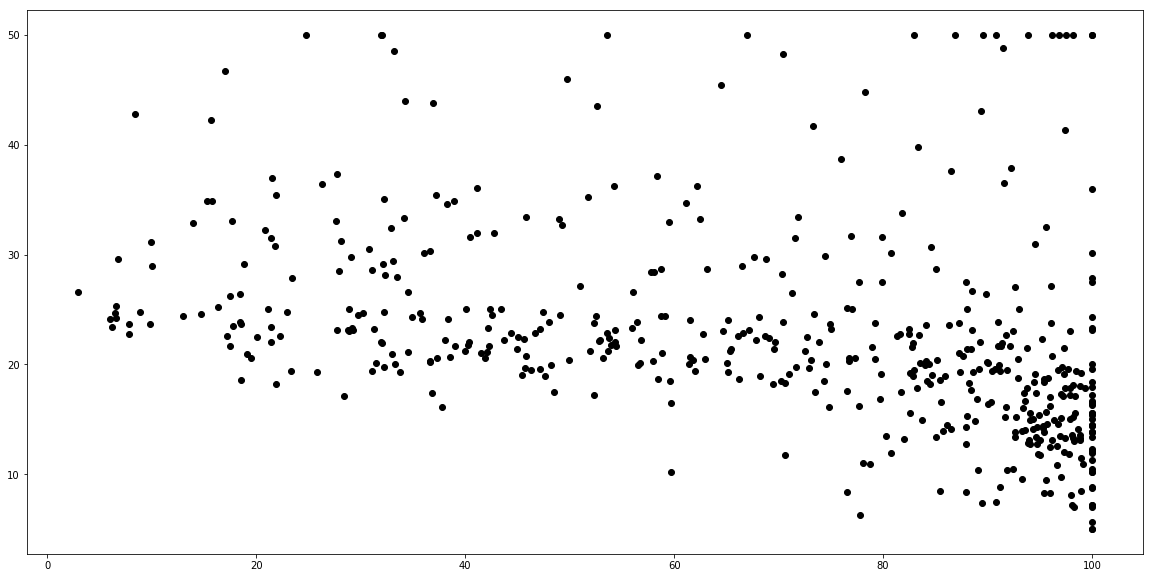

In [28]:
plt.figure(figsize = (20,10))
plt.scatter(data['age'], data['medv'], color = 'red', label = "Price")

можно сказать,что Бостонцев не особо волнует возраст их дома

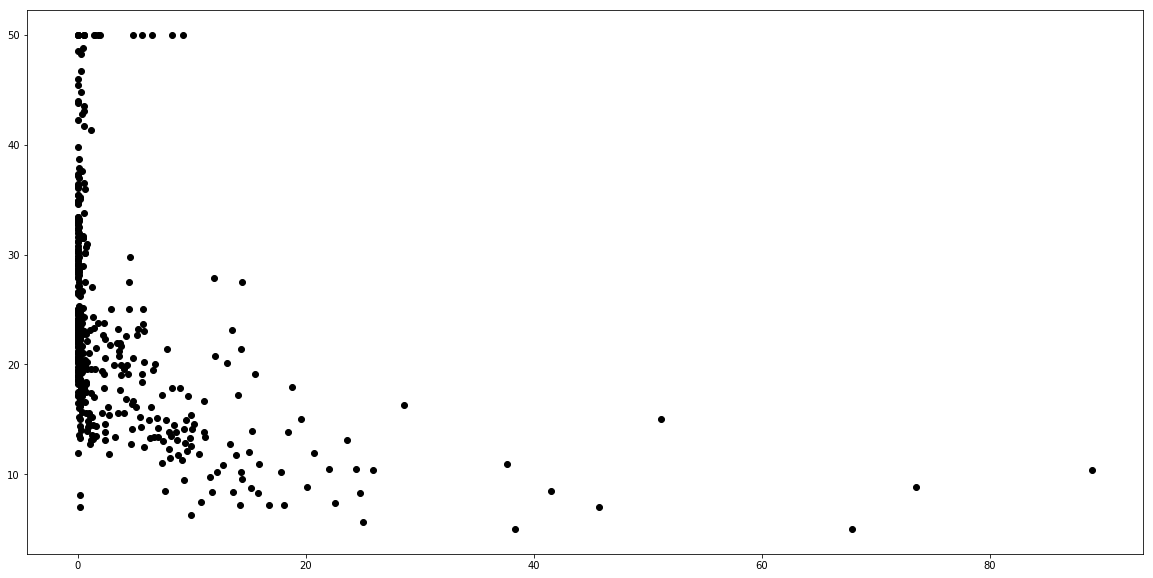

In [29]:
plt.figure(figsize = (20,10))
plt.scatter(data['crim'], data['medv'], color = 'red', label = "Price")

Отсюда видно, что чем меньше криминальный показатель района, тем больше средняя стоимость домов

In [32]:
results = sm.OLS.from_formula('medv ~ lstat + np.power(lstat, 2)', data = data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sun, 26 Apr 2020   Prob (F-statistic):          1.56e-112
Time:                        17:48:17   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0.872     49.149      0.000      41.149      44.575
lstat                 -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.power(lstat, 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Prob(Omnibus)<0.05, это значит, остатки можно считать не нормальными, т. е. шум ненормальный.
Заметим, что появилась строгая мультиколлениарность, между объясняющими переменными

In [36]:
results = sm.OLS.from_formula('medv ~ lstat + crim+ rm', data = data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Sun, 26 Apr 2020   Prob (F-statistic):          1.01e-112
Time:                        17:55:52   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5623      3.166     -0.809      0.419      -8.783       3.658
lstat         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
crim          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
rm             5.2170      0.442     11.802      0.000       4.348       6.085
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

В таком сочетании R возрастает,но Prob(Omnibus)<0.05

In [45]:
results = sm.OLS.from_formula('medv ~ lstat +rm+ crim+ age', data = data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     229.3
Date:                Sun, 26 Apr 2020   Prob (F-statistic):          1.02e-111
Time:                        18:37:22   Log-Likelihood:                -1577.0
No. Observations:                 506   AIC:                             3164.
Df Residuals:                     501   BIC:                             3185.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3491      3.171     -0.741      0.459      -8.579       3.881
lstat         -0.6126      0.056    -10.857      0.000      -0.723      -0.502
rm             5.1162      0.451     11.349      0.000       4.230       6.002
crim          -0.1064      0.032     -3.308      0.001      -0.170      -0.043
age            0.0126      0.011      1.129      0.259      -0.009       0.035
==============================================================================
Omnibus:                      161.909   Durbin-Watson:                   0.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              552.137
Skew:                           1.467   Prob(JB):                    1.27e-120
Kurtosis:                       7.192   Cond. No.                         993.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""